# 2. 지도학습 알고리즘 (분류, 회귀 알고리즘)
---
### [익혀야 할 포인트 요약]
### 지도학습 알고리즘 (교재 8~9장)
- 단순/다중선형회귀 (회귀)
> - 예측과 타겟 사이의 평균제곱오차를 최소화하는 회귀계수들을 찾는 방법.
> - 회귀계수의 해석, F검정으로 모델의 유효성 확인
> - 전처리(이상치, 영향치, 다중공선성), 변수 선택 방법, 잔차분석 방법 확인
    
- 로지스틱 회귀 (분류)
> - 종속변수에 연결함수인 logit function을 적용하며, 최대우도추정을 사용해 모델을 적합.
> - 회귀계수의 해석, 우도비 검정으로 모델의 유효성 확인
  
- 기타 회귀 (회귀)
> - 각 회귀 모델링의 개념과 방법 확인
> - 규제선형회귀: 릿지, 라쏘, 엘라스틱 넷
> - 이상치에 강한 회귀: robust 회귀, quantile 회귀
> - 비선형회귀: 다항 회귀, 스플라인 회귀
  
- 앙상블 (분류/회귀)
> - lightGBM, 랜덤 포레스트 등 모델링 방법과 장단점 확인
  
- KNN (분류/회귀)
> - 전처리, 거리 지표 설정, 모델링 방법과 장단점 확인
  
- SVM (분류/회귀)
> - 모델링 방법과 장단점 확인

- 나이브베이즈 분류기 (분류)
- 인공신경망 (분류/회귀)
  
### 모델 평가 지표 (교재 11장)
- 회귀 모델
> - MSE(mean squared error): 실제값과 예측값의 차이를 제곱해 평균을 계산한 것. (장점) 지표 자체가 직관적 (단점) 예측 변수와 단위가 다르며 스케일에 의존적임. 이상치에 민감함.
> - MAE(mean absolute error): 실제값과 예측값의 차이를 절댓값으로 변환해 평균을 계산한 것, 에러에 따른 손실이 선형적으로 올라가야 하거나 이상치가 많을 때 적합함. (장점) 지표가 직관적이며 예측변수와 단위가 같아 이해하기 쉬움. (단점) 잔차에 절댓값을 씌우기 때문에 실제 값에 대해 과소 예측인지 과대 예측인지 파악하기 힘들며, 스케일에 의존적임.
> - MAPE(mean absolute percentage error): MAE를 퍼센트로 변환한 것으로서 예측값 대비 잔차의 비율을 의미하며 주로 시계열 모형들의 적합치를 비교하는 데 사용함. (장점) 이해하기 쉬움. 모델 간 성능 비교에 용이. (단점) 실제 값에 대해 과대예측 혹은 과소예측 여부를 파악하기 힘듦. 비율로 해석할 때 의미가 있는 값에만 적용 가능. 실제 값에 0이 포함될 경우 MAPE를 계산할 수 없음.
> - 결정계수: 데이터에 대한 모델의 설명력을 0~1로 나타냄.

- 분류 모델
> - Accuracy: 전체 데이터 중 맞게 분류한 데이터의 비율. (TP+TN)/(TP+TN+FP+FN)
> - Precision: 예측을 1로 한 데이터들 중 1로 맞게 예측한 데이터의 비율. TP/(TP+FP)
> - Recall(=Sensitivity): 실제로 1인 데이터들 중 1로 맞게 예측한 데이터의 비율. TP/(TP+FN)
> - Specificity: 실제로 0인 데이터들 중 0으로 맞게 예측한 데이터의 비율. TN/(TN+FP)
> - F1-score: 정밀도와 재현율의 조화 평균.
> - ROC curve: 예측값을 양성으로 판단하는 확률 임곗값을 1에서 0으로 움직일 때의 거짓 양성 비율과 참 양성 비율을 그래프의 x, y 축으로 나타낸 것. 모든 데이터를 정확하게 예측했을 경우 ROC 곡선은 0, 1을 지나며, 랜덤 예측의 경우 ROC 곡선은 보통 대각선을 지난다.
> - AUC: ROC curve의 아래 면점. 분류 성능이 좋을수록 1에 가깝고 분류가 무작위이면 0.5, 분류를 완전 반대로 한 경우는 0.

## [연습문제]

### 1-1. 다음은 인도 벵갈루루의 집값 데이터이다. 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다. 데이터 컬럼 정의서는 아래와 같을 때, 선형 회귀 분석을 수행하시오. (데이터 링크는 아래 코드 참조)

In [1]:
from pandas import read_csv, concat, get_dummies
realestate = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
print(realestate)

     area_type  availability  size  total_sqft  bath  balcony   price
0        Super             0     3      1056.0     2        1   39.07
1         Plot             1     6      2600.0     5        3  120.00
2        Super             1     5      1521.0     3        1   95.00
3        Super             1     3      1170.0     2        1   38.00
4         Plot             1     6      2785.0     5        3  295.00
...        ...           ...   ...         ...   ...      ...     ...
7490     Super             1     5      1345.0     2        1   57.00
7491     Super             1     5      1715.0     3        3  112.00
7492  Built-up             1     8      3453.0     4        0  231.00
7493  Built-up             1     3      1141.0     2        1   60.00
7494     Super             0     7      4689.0     4        1  488.00

[7495 rows x 7 columns]


In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# feature에서 범주형 변수를 더미코딩하고, 상수항을 추가한 후, 데이터를 train/test set으로 분할
X = get_dummies(realestate.drop('price', axis=1), columns=['area_type'], drop_first=True)
X = sm.add_constant(X)
y = realestate['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# 현재 데이터로 선형회귀 분석을 수행
model1 = sm.OLS(y_train, X_train)
fitted1 = model1.fit()
print(fitted1.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred1 = fitted1.predict(X_test)
print(">>> test score {:.3f}".format(r2_score(y_test, pred1)))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### 1-2. 앞선 모델에서 변수 area_type과 total_sqft의 교호작용항을 추가하여 회귀분석을 수행하시오.

In [ ]:
# area_type과 total_sqft의 교호작용항을 추가한 X_train2, X_test2 생성
## formula활용하는 방법도 기억하기!
X_train2, X_test2 = X_train.copy(), X_test.copy()
for col in ['area_type_Carpet', 'area_type_Plot', 'area_type_Super']:
    X_train2[f"at_{col[10:]}:total_sqft"] = X_train[col] * X_train['total_sqft']
    X_test2[f"at_{col[10:]}:total_sqft"] = X_test[col] * X_test['total_sqft']

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model2 = sm.OLS(y_train, X_train2)
fitted2 = model2.fit()
print(fitted2.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred2 = fitted2.predict(X_test2)
print(">>> test score {:.3f}".format(r2_score(y_test, pred2)))

### 1-3. 앞선 모델에서 변수 total_sqft의 이차항을 추가하여 회귀분석을 수행하시오.

In [ ]:
# total_sqft의 이차항을 추가한 X_train3, X_test3 생성
X_train3, X_test3 = X_train2.copy(), X_test2.copy()
X_train3["total_sqft2"] = X_train2['total_sqft']**2 #I(total_sqft**2)
X_test3["total_sqft2"] = X_test2['total_sqft']**2

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model3 = sm.OLS(y_train, X_train3)
fitted3 = model3.fit()
print(fitted3.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred3 = fitted3.predict(X_test3)
print(">>> test score {:.3f}".format(r2_score(y_test, pred3)))

### 1-4. 앞선 모델에서 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과를 해석하시오.

In [ ]:
# Cook's distance, DFBETAS, DFFITS, LeverageH 등 영향치 기준으로 데이터를 판단하여 영향치를 제거하거나, VIF를 통해 다중공선성이 있는 변수를 제거하거나, AIC를 최소로하는 변수의 조합을 찾는 단계적 선택법으로 변수를 선택할 수 있다. 여기에서는 통계적으로 유의하지 않은 변수들을 제거함으로써 최종 변수를 선택하고자 한다.

X_train4, X_test4 = X_train3.copy(), X_test3.copy()

# 회귀계수 분석을 위해 feature scaling 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train4)
X_train4 = DataFrame(ss.transform(X_train4), columns=X_train4.columns)
X_test4 = DataFrame(ss.transform(X_test4), columns=X_test4.columns)
X_train4['const'] = 1
X_test4['const'] = 1

# 통계적으로 유의하지 않은 변수들 제거
del_feats = ['bath', 'at_Plot:total_sqft', 'availability']
X_train4 = X_train4.drop(del_feats, axis=1)
X_test4 = X_test4.drop(del_feats, axis=1)

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model4 = sm.OLS(y_train.values, X_train4)
fitted4 = model4.fit()
print(fitted4.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred4 = fitted4.predict(X_test4)
print(">>> test score {:.3f}".format(r2_score(y_test, pred4)))

# train score(R-squared) 0.644와 test score 0.726에 의하면, 
# 해당 모델은 데이터에 대한 설명력이 있다고 볼 수 있으며, 
# train/test set 성능 차이가 크지 않기 때문에 어느 정도 일반화된 모델이라고 볼 수 있다. 
# 모델의 통계적 유의성은 F-statistic으로 확인할 수 있는데 해당 통계량의 p-value(Prob)가 유의수준 0.05보다 작기 때문에 모델은 통계적으로 유의하다고 볼 수 있다.
# 각 변수에 대한 회귀계수들의 t통계량에 따른 p-value가 모두 유의수준보다 작기 때문에 이 회귀계수들 역시 통계적으로 유의하다고 볼 수 있다.
# 또한, 잔차분석을 통해 회귀모형에 대한 가정인 정규성, 등분산성, 독립성을 만족하는지를 확인해야 한다. 아래에서 Durbin-Watson 통계량이 2에 가까움으로써 독립성은 만족하고 있지만, Jarque-Bera 통계량의 p-value를 볼 때 유의수준보다 작기 때문에 정규성에 위배된다. 이처럼 모델이 회귀모형의 가정을 충족하지 못하는 경우, 추가로 자료를 수집하거나 변수 변환의 방법을 통해 가정을 충족하도록 모델을 다시 생성해야 한다.

## [기출문제]
### 1-1. 각 회차별로 1번 타자의 출루(1,2,3루타와 사사구(볼넷, 몸에맞는공))가 있는 경우에 대해 득점이 발생 했는지 확인하고자 한다. 이를 위한 전처리를 수행하라. (단, 첫 번째 혹은 두 번째 타자가 홈런을 친 경우 해당 회차 데이터는 제외한다.)

- ADP 29회 기출문제: https://www.datamanim.com/dataset/ADPpb/00/29.html
- 데이터 출처 : https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018 데이터를 후처리
- 데이터 설명 : A 야구구단의 시합 결과 중 일부를 나타낸다. 각 행은 하나의 경기를 의미(game_id)하며 9회차(= 9이닝) 동안 1번타자, 2번타자의 출루 정보를 의미한다. 각 컬럼에 대한 설명은 아래 이미지와 같으며, value값의 index는 이미지의 ‘수치 의미’ 열을 통해 확인 할 수 있다.  
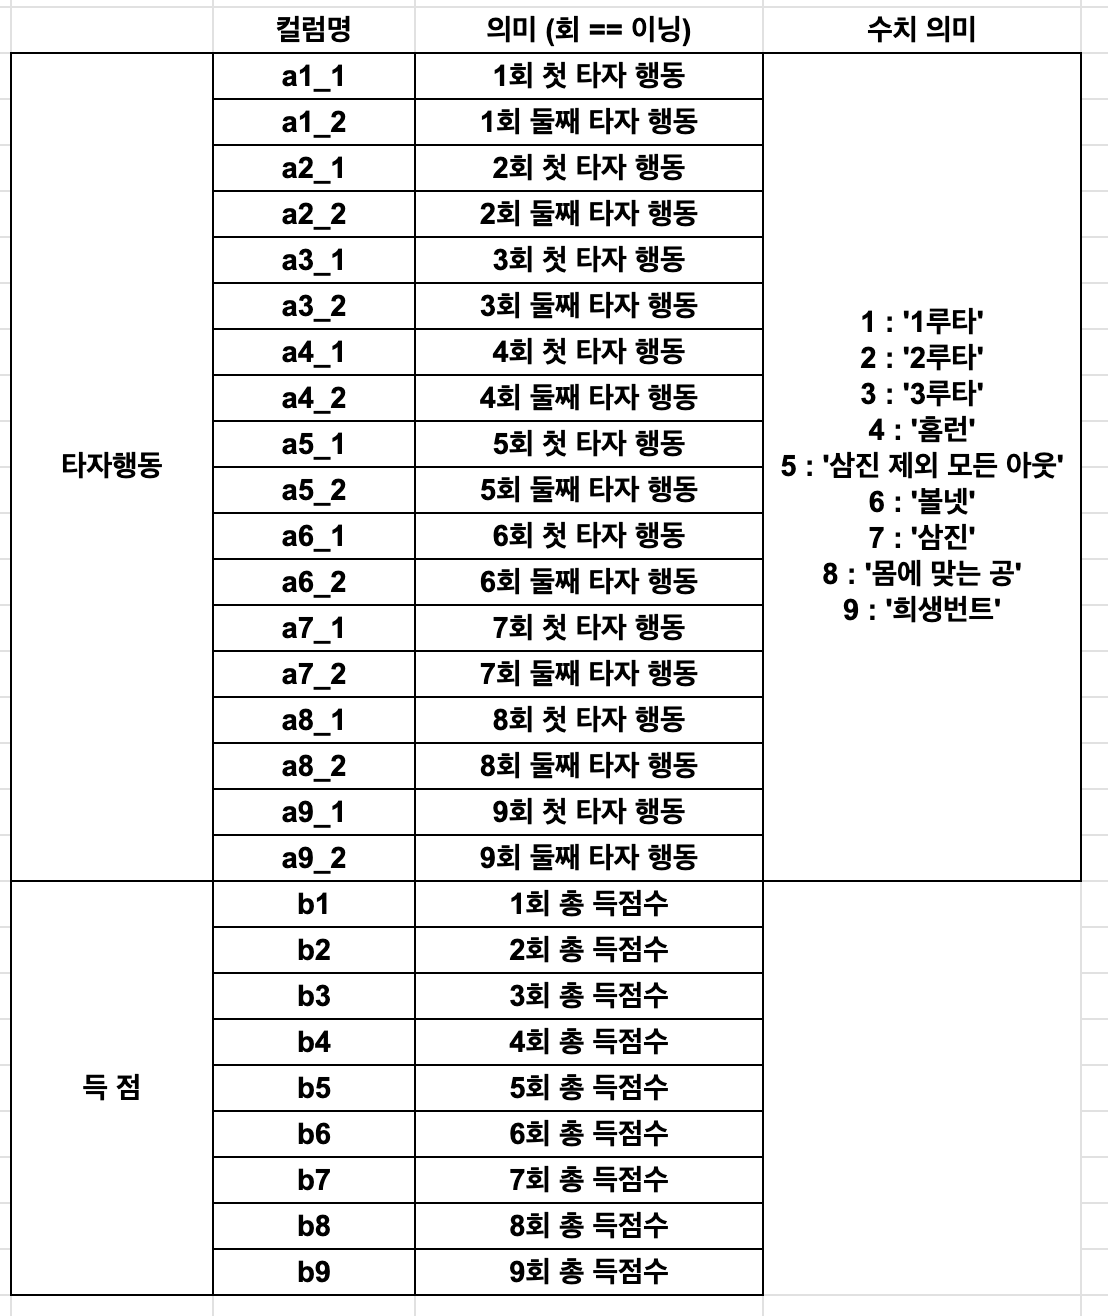

In [11]:
from pandas import read_csv
df = read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p2_.csv')
df

,game_id,a1_1,a1_2,a2_1,a2_2,a3_1,a3_2,a4_1,a4_2,a5_1,...,a9_2,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,201900016,5,5,5,5,5,5,5,5,5,...,5,0,0,0,0,0,0,0,4,2
1,201900023,6,4,5,5,2,5,1,1,6,...,7,3,0,0,1,0,1,3,1,0
2,201900103,5,6,5,5,1,9,5,4,6,...,6,0,0,1,1,4,1,2,0,1
3,201900112,5,7,6,1,5,5,1,5,1,...,5,0,3,0,0,0,0,1,0,0
4,201900131,5,1,2,5,2,5,7,2,6,...,6,0,2,4,1,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,201902346,7,5,7,4,1,9,5,7,7,...,1,0,1,2,0,0,0,0,0,1
196,201902365,2,5,1,1,7,5,5,7,5,...,9,0,0,0,0,1,0,0,0,2
197,201902373,,7,5,6,5,9,7,5,1,...,5,0,0,0,0,0,1,0,0,0
198,201902392,6,5,5,1,1,5,6,5,5,...,7,0,0,2,1,0,0,0,2,1


In [12]:
from pandas import DataFrame, concat
import numpy as np

df2 = DataFrame()
# hitter1, hitter2, score로 데이터 변형
for i in range(len(df)):
    hitters = df.iloc[i, 1:19].values.reshape(-1,2)
    scores = df.iloc[i, 19:].values
    mini_df = DataFrame(np.c_[hitters, scores], columns=['hitter1', 'hitter2', 'score'])
    df2 = concat([df2, mini_df])
df2 = df2.reset_index(drop=True)
df2

,hitter1,hitter2,score
0,5,5,0
1,5,5,0
2,5,5,0
3,5,5,0
4,5,5,0
...,...,...,...
1795,6,7,0
1796,2,9,4
1797,7,5,0
1798,5,6,0


In [13]:
# 이진변수로 변환
df2['score'] = df2['score'].apply(lambda x: 1 if x>=1 else 0) 
df2

,hitter1,hitter2,score
0,5,5,0
1,5,5,0
2,5,5,0
3,5,5,0
4,5,5,0
...,...,...,...
1795,6,7,0
1796,2,9,1
1797,7,5,0
1798,5,6,0


In [7]:
# hitter1에 있는 결측치 및 이상치 제거, 나머지 데이터를 수치형으로 변환
df2['hitter1'] = df2['hitter1'].apply(lambda x: np.nan if x in ['"', ' ','&',' :'] else x)
print(df2.isna().sum())
df2 = df2.dropna(axis=0)
df2['hitter1'] = df2['hitter1'].astype('int64')

hitter1    22
hitter2     0
score       0
dtype: int64


C:\Users\masta\AppData\Local\Temp\ipykernel_19320\704337178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hitter1'] = df2['hitter1'].astype('int64')


In [8]:
# hitter2 수치형으로 변환
df2['hitter2'] = df2['hitter2'].astype('int64')

C:\Users\masta\AppData\Local\Temp\ipykernel_19320\2486834455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hitter2'] = df2['hitter2'].astype('int64')


In [9]:
# 첫 번째 혹은 두 번째 타자가 홈런(4)을 친 경우의 데이터를 삭제 후, reset index
df3 = df2[(df2['hitter1']!=4) & (df2['hitter2']!=4)].reset_index(drop=True)

# 첫번째 타자가 1, 2, 3, 6, 8인 경우, 득점 여부를 아래 데이터로 확인할 수 있다.
df3 = df3[df3['hitter1'].isin([1,2,3,6,8])].reset_index(drop=True)
df3 # 전처리 완료!

,hitter1,hitter2,score
0,1,1,1
1,1,5,1
2,2,5,0
3,1,1,1
4,6,5,0
...,...,...,...
530,1,5,1
531,6,5,1
532,2,1,0
533,6,7,0


### 1-2. 데이터에 대해 Logistic Regression을 적용하고 2번타자의 희생번트 여부에 대한 회귀 계수 검정을 하라

In [10]:
# 범주형 변수에 대해 더미코딩 진행
from pandas import get_dummies
df4 = get_dummies(df3, columns=['hitter1', 'hitter2'], drop_first=True) #다중공선성 방지

# Logistic Regression w/ statsmodels
import statsmodels.api as sm
X = df4.drop(['score'], axis=1)
y = df4['score']

X_ = sm.add_constant(X)
model = sm.Logit(y, X_)
fitted = model.fit()
print(fitted.summary())
# 로지스틱 회귀 분석 결과, 2번타자의 희생번트(hitter2_9) 여부에 대한 회귀계수는 -0.3514로서 2번타자가 희생번트를 할수록 득점 가능성이 낮아지는 것으로 해석할 수 있다. 하지만, 해당 회귀 계수를 검정한 결과 z 검정통계량이  -0.974이고 이에 따른 유의확률이 0.330이기 때문에 해당 회귀 계수가 0과 차이가 없다는 귀무가설을 기각할 수 없다. 결과적으로 2번 타자의 희생번트 여부에 대한 회귀 계수는 통계적으로 유의하지 않다고 할 수 있다.

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### 1-3. SMOTE (random_state =0 지정)를 적용하여 data imbalance를 해결하라

In [ ]:
# 해당 데이터의 클래스 분포를 살펴보면 아래와 같이 불균형 상태임을 알 수 있다.
print(y.value_counts())

# 이처럼 클래스 불균형 상태에서 데이터를 학습할 경우, 데이터 수가 적은 클래스의 분포를 적절히 학습하지 못하고 다수 클래스에 과대 적합 되어 대부분의 데이터를 다수 클래스로 분류하는 문제가 발생하기도 한다. 이에 데이터의 수가 부족한 클래스의 데이터 수를 늘리는 오버샘플링을 통해 data imbalance를 해결하고자 한다. 여기서는 오버샘플링 방법 중에서도 SMOTE를 적용하기로 한다.

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0, k_neighbors=10)
X_2, y2 = os.fit_resample(X_, y)
print(y2.value_counts())

### 1-4. 구성 데이터에 Logistic Regression을 적용하고 결과를 분석하라

In [ ]:
model2 = sm.Logit(y2, X_2)
fitted2 = model2.fit_regularized(method='l1') # .fit()으로는 "LinAlgError: Singular matrix" 발생하여 규제화 기법으로 모델링함
print(fitted2.summary())
# 앞서 불균형 데이터로 적합한 모델과 비교했을 때 결정계수 상으로는 큰 차이가 없는 로지스틱 회귀 모델을 얻었다. 해당 모델의 LLR p-value가 유의수준 0.05보다 낮기 때문에 모델 자체는 유의하다고 볼 수 있으나 결정계수 면에서 설명력이 높은 모델이라고 보기는 어렵다. 회귀계수들 중에서도 hitter1_3, hitter1_6, hitter2_6, hitter2_8, hitter2_3, hitter2_6, hitter2_8, hitter2_9는 회귀계수 검정 결과 유의하지 않은 회귀계수로 판단된다. 따라서 통계적으로 유의하지 않은 회귀계수들을 제거하고, 득점 여부를 더 잘 예측할 수 있는 새로운 feature를 추가하여 새로운 모델을 적합하는 것이 필요할 것으로 생각된다.

## 2. 대구 영구임대아파트 퇴거여부 데이터
- ADP 29회 기출문제: https://www.datamanim.com/dataset/ADPpb/00/29.html
- 데이터 출처 : https://www.data.go.kr/data/15094266/fileData.do 후처리
- 데이터 설명 : 대구도시공사_빅데이터_영구임대아파트 입주자 퇴거여부 데이터, 고유번호를 가진 계약자와 특정 아파트에 대해 매년 퇴거여부를 기록한 데이터

In [ ]:
from pandas import read_csv
apart = read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p1.csv', encoding='euc-kr')
apart

### 2-1. 계약자고유번호를 기준으로 거주연도 별 여러개의 데이터가 쌓여 있다. 각 계약자고유번호에 대해 가장 최신의 거주연도 행만 남겨라.

In [ ]:
print(apart['순번'].nunique())

In [ ]:
apart2 = DataFrame()
for uniqueID in apart['순번'].unique():
    apart2 = concat([apart2, apart[apart['순번']==uniqueID].sort_values(by='거주연도').tail(1)])
apart2 = apart2.reset_index(drop=True)
apart2

### 2-2. EDA 및 결측치 처리 (시각화 포함)

In [ ]:
# 해당 데이터는 총 23개의 변수로 구성되어 있으며, 데이터의 크기는 10472이고, 일부 변수(계약구분, 아파트 평점, 퇴거연도)에서 결측치가 발견되었다. 전체 변수들 중, 순번, 계약구분, 아파트 이름, 아파트 ID, 아파트 평점, 호실 고유번호, 평형대, 계약자고유번호, 계약서고유번호, 성별, 결혼여부, 퇴거여부의 12개 변수는 질적 변수이고 나머지 변수는 양적 변수로 구성되어 있다.
apart2.info()

In [ ]:
# 질적 변수(명목/순서척도)의 EDA
Qual_var = ['순번', '계약구분', '아파트 이름', '아파트 ID', '아파트 평점', '호실고유번호', '평형대', '계약자고유번호', '계약서고유번호', '성별', '결혼여부', '퇴거여부']

apart2[Qual_var] = apart2[Qual_var].astype('category')
apart2[Qual_var].describe(include='all')
# 명목척도인 순번, 호실고유번호, 계약자고유번호, 계약서고유번호는 데이터 수만큼의 범주를 가지거나 상당한 수의 범주를 가진다.
# 계약구분, 성별, 결혼여부, 퇴거여부는 이진변수로서 2개 범주를 가진다.
# 이밖에 아파트 이름은 5개, 아파트 ID는 5개, 아파트 평점은 4개, 평형대는 3개의 범주를 가지는 것으로 나타났다.
# 각 범주들 중 가장 빈도가 높은 범주는, 순번은 1, 계약구분에서는 유효, 아파트 이름은 비둘기아파트, 아파트 ID는 1, 아파트 평점은 5, 호실고유번호는 43924, 평형대는 12, 계약자고유번호는 12598, 계약서 고유번호는 1, 성별은 여, 결혼여부는 미혼, 퇴거여부는 미퇴거인 것으로 각각 나타났다.
# 계약구분, 아파트 평점 변수에서 결측치가 발견된다.

In [ ]:
# 질적변수는 막대그래프와 파이그래프로 시각화하여 직관적으로 확인이 가능하다.
# 시각화 의미가 없는 순번, 호실고유번호, 계약자고유번호, 계약서고유번호는 제외한다.
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

Qual_var2 = ['계약구분', '아파트 이름', '아파트 ID', '아파트 평점', '평형대', '성별', '결혼여부', '퇴거여부']
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
plt.subplots_adjust(wspace=0.6, hspace=0.3)
for vari, ax in zip(Qual_var2, axes.ravel()):
    apart2[vari].value_counts().plot.barh(ax=ax)
    ax.set_title(vari)
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
for vari, ax in zip(Qual_var2, axes.ravel()):
    apart2[vari].value_counts().plot.pie(ax=ax, autopct="%.2f%%")
    ax.set_title(vari)
plt.show()

In [ ]:
# 양적 변수(비율/등간척도)의 EDA
Quan_var = ['재계약횟수', '거주개월', '층', '입주연도', '퇴거연도', '거주연도', '월세(원)', '보증금(원)', '대표나이', '나이', '거주자 수']
apart2[Quan_var].describe(include='all').round(1)
# 양적 변수들에서는 퇴거연도가 과반수 이상의 결측치를 갖는 것으로 나타났다.
# 각 변수들의 평균, 표준편차, 최솟값, 1/2/3사분위수, 최댓값을 아래에서 확인할 수 있다.

In [ ]:
# 양적변수는 히스토그램과 박스플롯을 통해 데이터의 분포와 이상치를 확인할 수 있다.
fig, axes = plt.subplots(2, 6, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
for vari, ax in zip(Quan_var, axes.ravel()):
    apart2[vari].hist(ax=ax)
    ax.set_title(vari)
plt.show()

fig, axes = plt.subplots(2, 6, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.3)
for vari, ax in zip(Quan_var, axes.ravel()):
    ax.boxplot(apart2[vari])
    ax.set_title(vari)
plt.show()

### 2-3. 이상치 처리

In [ ]:
# 앞선 탐색적 분석 결과, 거주연도, 월세, 보증금, 대표나이, 나이, 거주자수에서 이상치가 발견되었다. 그 중에서 거주연도, 월세, 보증금은 실제로 있을 수 있는 데이터 범위 내라고 판단되어 이상치 처리하지 않도록 한다. 거주자 수 역시 이상치이기는 하지만 그 값이 극소수이며 실제 있을 수 있는 데이터라고 판단되어 이상치 처리하지 않도록 한다. 반면, 나이와 대표 나이에서 보이는 이상치는 상한값을 90세로 클리핑하기로 한다. 하한값은 20~21세인데 그대로 두기로 한다.
apart2['대표나이'] = apart2['대표나이'].clip(apart2['대표나이'].min(), 90)
apart2['나이'] = apart2['나이'].clip(apart2['나이'].min(), 90)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for vari, ax in zip(['대표나이', '나이'], axes.ravel()):
    ax.boxplot(apart2[vari])
    ax.set_title(vari)
plt.show()

### 2-4. 재계약 횟수의 중앙값을 기준으로 중앙값보다 크거나 같으면 ‘높음’, 작으면 ‘낮음’ 으로 재계약 횟수 이분 변수를 구성하시오.

In [ ]:
MED = apart2['재계약횟수'].median() #6
apart2['재계약이분변수'] = apart2['재계약횟수'].apply(lambda x: '높음' if x >=MED else '낮음')
apart2

### 2-5. 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

In [ ]:
# 해당 데이터는 차원축소가 필요한 것으로 보인다. 나이와 대표나이, 아파트ID와 아파트 이름, 계약구분과 퇴거여부, 등 동일한 정보를 나타내는 특성들이 중복되어 나타나고, 데이터 특성 상 별다른 정보가 없는 순번, 호실고유번호, 계약자고유번호, 계약서고유번호 등의 특성들이 포함되어 있기 때문이다. 또한, 재계약횟수와 상관관계가 적은 층, 거주자수의 변수도 삭제하고자 한다. 과반수가 결측치인 퇴거연도도 삭제한다.
apart3 = apart2.drop(['순번', '나이', '아파트 ID', '퇴거연도', '호실고유번호', '계약자고유번호', '계약서고유번호', '층', '거주자 수', '퇴거여부'], axis=1)
apart3

### 2-6. 재계약 횟수 이분변수를 기준으로 세그먼트를 구분하고 각 세그먼트의 특징을 분석하시오.

In [ ]:
# 재계약횟수가 높음으로 나타난 세그먼트의 경우, 계약구분이 유효인 경우가 더 빈번하고, 재계약횟수의 평균이 8.6으로 나타난다. 평균 거주개월은 201.8개월, 아파트 평점 최빈 값은 7.0, 입주년도 중앙값은 2003년으로 나타난다. 월세 평균은 77157원, 보증금 4848883원, 대표나이 중앙값 67, 성별 최빈값은 여성, 결혼 최빈값은 미혼으로 나타난다.
apart3.query("재계약이분변수=='높음'").describe(include='all').round(1)

In [ ]:
# 반면, 재계약횟수가 낮음으로 나타난 세그먼트의 경우, 계약구분이 해지인 경우가 더 빈번하고, 재계약횟수의 평균이 2.9로 나타난다. 평균 거주개월은 68.1개월, 아파트 평점 최빈 값은 5.0, 입주년도 중앙값은 2012년으로 나타난다. 월세 평균은 49326원, 보증금 2656682원, 대표나이 중앙값 63, 성별 최빈값은 여성, 결혼 최빈값은 미혼으로 나타난다.
apart3.query("재계약이분변수=='낮음'").describe(include='all').round(1)

### 2-7. 재계약횟수 변수를 종속변수로 하는 회귀 분석을 두 가지 이상의 방법론을 통해 수행하고 최종 모델을 결정하시오.

In [ ]:
# 선형회귀와 랜덤포레스트회귀 방법으로 재계약횟수 변수를 종속변수로 하는 회귀 모델링을 진행하고자 한다.
from sklearn.model_selection import train_test_split
apart3 = apart3.dropna(axis=0) # 결측치 있는 데이터 삭제

# X의 범주형 변수들 전처리
X = apart3.drop(['재계약횟수', '재계약이분변수'], axis=1)
X['계약구분'] = X['계약구분'].apply(lambda x: 1 if x=='유효' else 0)
X['성별'] = X['성별'].apply(lambda x: 1 if x=='남' else 0)
X['결혼여부'] = X['결혼여부'].apply(lambda x: 1 if x=='기혼' else 0)
X = get_dummies(X, columns=['아파트 이름'], drop_first=True)

# X의 feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = DataFrame(ss.fit_transform(X), columns=X.columns)

y = apart3['재계약횟수']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
lr.fit(X_train, y_train)
trainScore, testScore = lr.score(X_train, y_train), lr.score(X_test, y_test)
print("Linear regression train score {:.3f}, test score {:.3f}".format(trainScore, testScore))

rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train, y_train)
trainScore, testScore = rf.score(X_train, y_train), rf.score(X_test, y_test)
print("RandomForest regression train score {:.3f}, test score {:.3f}".format(trainScore, testScore))
# RandomForest 모델은 결정계수가 좀 더 높아 데이터에 대한 설명력이 더 높은 모델이지만, 각 변수가 타겟변수에 대해 어떤 영향을 주는지 확인하기 어렵다. 이에 설명력이 유사하고, 각 변수가 타겟변수에 대해 어떤 영향을 주는지 회귀계수를 통해 확인할 수 있는 선형회귀 모델을 최종 모델로 선택하기로 한다.

### 2-8. 최종 채택한 모델에서 각각 유의하게 작용하는 변수를 확인 하고 설명하시오

In [ ]:
DataFrame({'feat':X_train.columns, "coef": lr.coef_}).sort_values(by='coef', ascending=False).round(2)
# 최종 선택된 선형회귀 모델의 회귀계수들에 의하면 입주연도가 높을수록 재계약횟수가 높아지고, 거주연도가 높을수록 재계약횟수가 낮아지는 것으로 나타났다.

### 2-9. 해당 데이터 분석결과로 얻을 수 있는 점 제시

In [ ]:
# 재계약횟수를 예측하는데 있어서 입주연도와 거주연도가 중요한 것으로 나타났다.